<a href="https://colab.research.google.com/github/vatsaaa/mtech/blob/main/semester_1/03_assignments/aci/ACI_ASSIGNMENT_1/ACI_Assignment_1_SolutionTemplate_PS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

List only the BITS (Name) of active contributors in this assignment:
1. [G. Ankur Vatsa](mailto:2023aa05727@wilp.bits-pilani.ac.in)
2. [NIDASANAMETLA SREE SITAMAHALAKSHMI](mailto:2023aa05716@wilp.bits-pilani.ac.in)
3. [PRASENJIT SAMANTA](mailto:2023aa05256@wilp.bits-pilani.ac.in)
4. [RANDHAWANE SANTOSH BABAN](2023aa05828@wilp.bits-pilani.ac.in)
5. [VEDAGIRI SAI KRISHNA](mailto:2023aa05348@wilp.bits-pilani.ac.in)

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [51]:
#Code Block : Set Initial State (Must handle dynamic inputs)
from abc import ABC
from pprint import pprint
import resource, time
import matplotlib.pyplot as plt

grid = [
    ['S', '.', '.', '.', '#', '#', '.', '.'],
    ['.', 'F', 'F', '.', '.', '.', '.', 'F'],
    ['.', '.', '.', '.', '.', '.', '.', '.'],
    ['#', '#', '.', 'F', '.', '.', '.', '.'],
    ['.', 'F', '.', '.', '.', '.', '#', '#'],
    ['.', '.', '.', 'F', '.', '.', '.', '.'],
    ['.', '#', '#', '.', '.', 'F', '.', '.'],
    ['.', '.', '.', '.', '.', 'F', '.', 'G']
]

def track_time_and_space(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        start_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        result = func(*args, **kwargs)
        end_time = time.time()
        end_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

        execution_time = end_time - start_time
        memory_usage = (end_memory - start_memory) / 1024  # Convert to kilobytes

        print(f"Execution time: {execution_time} seconds")
        print(f"Memory usage: {memory_usage} KB")

        return result

    return wrapper

class GridEnvironment:
    def __init__(self, grid: list[list[str]], display: bool = False):
        def find_start_and_goal():
            for i in range(self.rows):
                for j in range(self.cols):
                    if self.grid[i][j] == 'S':
                        self.start = tuple((i, j))
                    elif self.grid[i][j] == 'G':
                        self.goal = tuple((i, j))
            print("Start {start}, Goal {goal}:".format(
                start=self.start,
                goal=self.goal))

        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.display = display
        find_start_and_goal()

    def visualize(self, path):
      plt.figure(figsize=(len(self.grid), len(self.grid[0])))
      plt.plot(*zip(*path), marker='>', color='red', label='Path')
      plt.scatter(*path[0], marker='+', color='green', label='Start')
      plt.scatter(*path[-1], marker='x', color='blue', label='Goal')
      plt.legend()
      plt.grid(True)
      plt.show()

    def is_valid_move(self, row, col):
        return (
            0 <= row < self.rows
            and 0 <= col < self.cols
            and self.grid[row][col] != '#'
            and self.grid[row][col] != 'F'
        )

    def get_adjacent_cells(self, row, col, algorithm=None):
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)] # degrees of freedom - need to revise by prasnejit
        adjacent_cells = [] # Return empty list of adjacent cells if all moves are invalid
        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            if self.is_valid_move(new_row, new_col):
                if algorithm == "greedy" and self.display:
                    print(" The move is valid for this %d and %d"
                          % (new_row, new_col))
                adjacent_cells.append(tuple((new_row, new_col)))
        return adjacent_cells

    def goal_reached(self, row, col):
        return (row, col) == self.goal

In [25]:
from abc import ABC, abstractmethod

class ISearchAlgorithm(ABC):
    def __init__(self) -> None:
        super().__init__()

    @abstractmethod
    def search(self):
        pass

    def heuristic(self, row: int, col: int):
        pass

In [ ]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)

In [ ]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented

In [ ]:
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented
start_pos = tuple(int, int)
goal_pos = tuple(int, int)

### 2.	Definition of Algorithm 1 (Greedy Best First Search)

In [26]:
#Code Block : Function for algorithm 1 implementation
from heapq import heappush, heappop
from collections import deque
from typing import List, Tuple

class GBFSearchAlgorithm(ISearchAlgorithm):
    """
    Greedy Best-First Search Algorithm implementation.

    This algorithm uses a priority queue to explore the search space based on a heuristic function.
    It expands the node with the lowest heuristic value, prioritizing the most promising paths towards the goal.

    Attributes:
        None

    Methods:
        search(grid_env: GridEnvironment) -> Tuple[List[Tuple[int, int]], int]:
            Performs the greedy best-first search on the given grid environment.

        heuristic(row: int, col: int) -> int:
            Calculates the heuristic value for a given cell in the grid.

        time_complexity() -> str:
            Returns the time complexity of the algorithm.

        space_complexity() -> str:
            Returns the space complexity of the algorithm.

    """
    def __init__(self, grid_env: GridEnvironment) -> None:
        super().__init__()

        self.grid_env = grid_env

    @track_time_and_space
    def search(self) -> Tuple[List[Tuple[int, int]], int, int]:
        """
        Performs the greedy best-first search on the given grid environment.

        Args:
            grid_env (GridEnvironment): The grid environment to search in.

        Returns:
            Tuple[List[Tuple[int, int]], int]: A tuple containing the path taken by the agent and the total path cost.

        """
        start = self.grid_env.start
        goal = self.grid_env.goal
        visited = set()
        pq = [(self.heuristic(*start), start)]
        came_from = {}
        cost_so_far = {start: 0}  # Store the cost of reaching each cell

        while pq:
            _, current = heappop(pq)
            if current == goal:
                # Reconstruct and print the path
                path = deque()
                total_cost = cost_so_far[current]
                while current != start:
                    path.appendleft(current)
                    current = came_from[current]
                path.appendleft(start)

                if self.grid_env.display:
                    print("Path taken by the agent:", list(path))
                    print("Total path cost:", total_cost)

                return list(path), total_cost
            visited.add(current)

            for next_cell in self.grid_env.get_adjacent_cells(*current, algorithm="greedy"):
                if next_cell in visited:  # Check if the cell has already been visited
                    continue  # Skip to the next iteration if the cell has been visited

                new_cost = cost_so_far[current] + 1  # Assuming each step has a cost of 1
                if next_cell not in cost_so_far or new_cost < cost_so_far[next_cell]:
                    cost_so_far[next_cell] = new_cost
                    # print("Cost of next cell", cost_so_far[next_cell])
                    priority = new_cost + self.heuristic(*next_cell)
                    # print("Priority of next cell", priority)
                    heappush(pq, (priority, next_cell))
                    came_from[next_cell] = current

    def heuristic(self, row: int, col: int) -> int:
        """
        Calculates heuristic value for a given cell in the grid. Considering
        if the adjacent cells are safe, water bodies, or flooded roads

        Args:
            row (int): The row index of the cell.
            col (int): The column index of the cell.

        Returns:
            int: The heuristic value for the cell.

        """
        score = 0
        for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            new_row, new_col = row + dr, col + dc
            if 0 <= new_row < self.grid_env.rows and 0 <= new_col < self.grid_env.cols:
                if self.grid_env.grid[new_row][new_col] == '.':
                    score += 5  # Add 5 points for adjacent safe places
                elif self.grid_env.grid[new_row][new_col] == '#':
                    score -= 5  # Deduct 5 points for adjacent water bodies
                elif self.grid_env.grid[new_row][new_col] == 'F':
                    score -= 3  # Deduct 3 points for flooded roads
        return score


### 3.	Definition of Algorithm 2 (Genetic Search Algorithm)

In [27]:
#Code Block : Function for algorithm 2 implementation
import random
from abc import ABC

class Individual(ABC):
    def __init__(self, grid_env: GridEnvironment):
        self.individual_type = "Child"  # Every individual is a child, until it is a parent
        self.grid_env = grid_env
        self.path = [tuple(grid_env.start)]
        self.fitness = 0

        current_pos = grid_env.start
        while current_pos != grid_env.goal:
            adjacent_cells = grid_env.get_adjacent_cells(*current_pos, algorithm="genetic")
            next_pos = random.choice(adjacent_cells)
            self.path.append(next_pos)
            current_pos = next_pos

    def set_path(self, path: list):
        self.path = path

    def evaluate_fitness(self):
        for pos in self.path:
            row, col = pos
            if self.grid_env.grid[row][col] == '.':
                self.fitness += 5
            elif self.grid_env.grid[row][col] == '#':
                self.fitness -= 5
            elif self.grid_env.grid[row][col] == 'F':
                self.fitness -= 3

    def mutate(self, mutation_rate: float):
        for i in range(1, len(self.path) - 1):
            if random.random() < mutation_rate:
                adjacent_cells = self.grid_env.get_adjacent_cells(*self.path[i], algorithm="genetic")
                self.path[i] = random.choice(adjacent_cells)

class GeneticSearchAlgorithm(ISearchAlgorithm):
    def __init__(self, grid_env):
        self.grid_env: GridEnvironment = grid_env
        self.population_size = 10
        self.generations = 100
        self.mutation_rate = 0.01

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, min(len(parent1.path), len(parent2.path)) - 1)
        # Single point crossover
        child_path = parent1.path[:crossover_point] + parent2.path[crossover_point:]

        child = Individual(self.grid_env)
        child.set_path(child_path)

        return child

    @track_time_and_space
    def search(self):
        population = [Individual(self.grid_env) for _ in range(self.population_size)]

        for generation in range(self.generations):
            for individual in population:
                individual.evaluate_fitness()

            population.sort(key=lambda x: x.fitness, reverse=True)

            if population[0].fitness == 40:  # Max possible fitness - to be revised later
                break

            next_generation = population[:2]  # Elitism
            while len(next_generation) < self.population_size:
                parent1 = random.choice(population[:self.population_size // 2])
                parent2 = random.choice(population[:self.population_size // 2])
                child = self.crossover(parent1, parent2)
                child.mutate(self.mutation_rate)
                next_generation.append(child)

            population = next_generation

        best_individual = population[0]
        path = best_individual.path
        cost = 0
        for pos in path:
            row, col = pos
            if self.grid_env.grid[row][col] == '.':
                cost += 5
            elif self.grid_env.grid[row][col] == '#':
                cost -= 5
            elif self.grid_env.grid[row][col] == 'F':
                cost -= 3
        return path, cost


In [28]:
class SearchAlgorithmFactory:
    @staticmethod
    def create_search_algorithm(args):
        env = GridEnvironment(grid, args.display)

        if args.display:
            pprint(env.grid) # Print the grid

        if args.gbfs:
            return GBFSearchAlgorithm(env)
        elif args.genetic:
            return GeneticSearchAlgorithm(env)
        else:
            print("Please select an algorithm to run. Use -h for help.")
            return

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [ ]:
#Code Block : Function & call to get inputs (start/end state)

### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [52]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))
grid_env = GridEnvironment(grid)
gbfs = GBFSearchAlgorithm(grid_env)

found_path, at_cost = gbfs.search()

Start (0, 0), Goal (7, 7):
Execution time: 0.0006246566772460938 seconds
Memory usage: 0.0 KB


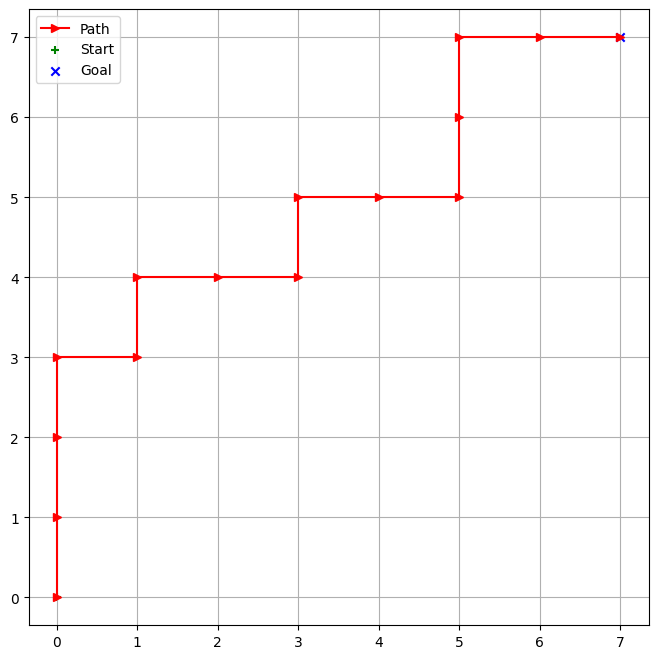

In [53]:
grid_env.visualize(found_path)

In [ ]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))
genetic_algorithm = GeneticSearchAlgorithm(grid_env)

genetic_algorithm.search()

Execution time: 1.5749688148498535 seconds
Memory usage: 0.2578125 KB


([(0, 0),
  (1, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (2, 1),
  (2, 0),
  (1, 0),
  (0, 0),
  (0, 1),
  (0, 0),
  (1, 0),
  (0, 0),
  (1, 0),
  (0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 2),
  (0, 3),
  (0, 2),
  (0, 1),
  (0, 0),
  (1, 0),
  (2, 0),
  (1, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (1, 0),
  (0, 0),
  (0, 1),
  (0, 0),
  (0, 1),
  (0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 3),
  (1, 4),
  (2, 4),
  (1, 4),
  (2, 4),
  (3, 4),
  (2, 4),
  (2, 5),
  (2, 4),
  (1, 4),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 4),
  (2, 4),
  (2, 3),
  (2, 4),
  (2, 3),
  (2, 2),
  (2, 3),
  (2, 2),
  (2, 1),
  (2, 2),
  (2, 3),
  (1, 3),
  (0, 3),
  (0, 2),
  (0, 3),
  (0, 2),
  (0, 1),
  (0, 2),
  (0, 1),
  (0, 0),
  (0, 1),
  (0, 0),
  (1, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (2, 1),
  (2, 0),
  (1, 0),
  (0, 0),
  (0, 1),
  (0, 0),
  (1, 0),
  (0, 0),
  (0, 1),
  (0, 0),
  (0, 1),
  (0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 3),
  (2, 3),
  (2, 2),
  (2, 1),
  (2, 0),
  (2, 1),
  (2, 0),
  (1, 0),


### 5.	Comparitive Analysis

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 1

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 2

### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : _______________________________________________

________________________________________________________

_________________________________________________________